## <center><font color='Purple' face='Cursive' size='6'> Cars Analysis</font></center>

<font size='3'><b>Problem Statement:</b> A New Car Manufacturing company,XYZManuCoLtd wants to understand the market. So, Inoder to unserstand the competition and devise their strategies they have hired you as a Data Analyst to analyse the cars that are currently in market and provide them some useful insights.

You have not been given any dataset to work upon by the company and as the details of cars in the market can be obtained from other resources</font>

<font color='Maroon' face='Cursive' size='3'>The Problem can be Broadly divided into two Parts<br>
    1. Web Scrapping Car features<br>
    2. Analysing the Scrapped features.<br> </font>
Lets start with the first part

### Web Scrapping

<font color='Green' face='Cursive'> Here we have not been provided with any dataset and so we need to directly pick the data bfrom some trustworthy website that gives the details from Internet. This can be acheived using Web Scrapping.</font>

<font color='Brown' face='Cursive'>Web Scrapping:</font><font color='Blue' face='Cursive'>Web Scraping is a process to extract valuable information from websites and online contents. It is a free method to extract information and receive datasets for further analysis.</font>

<font color='Green' face='Cursive'>One of the most popular library for web scrapping is Beautiful Soup. However for our current context we will be mostly using Selenium for extracting the information </font>

<font color='Blue' face='Cursive'>
But first let us install beautiful soup, selenium and also requests library which would help in sending requests to websites</font>

In [1]:
# Install Beautifulsoup
!pip install beautifulsoup4

In [2]:
# Install Requests
!pip install requests

<font color='Orange' face='Cursive'>I already have beautifulsoup and requests installed on my system. The above commands are for installation. If already installed, above steps can be ignored</font>

In [13]:
#Install Selinium
!pip install selenium

<font color='Green' face='Cursive'> Here in we will be scrapping car features from [BuyCarsOnlinePortal](https://www.buycarsonline.in/mAllBrand.aspx).

In [31]:
# import required libraries
from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
import time

<font color='Blue' face='Cursive'> Let us create a function to fetch the data. Here we will be using several functions provided by selenium by providing a web driver. A brief introduction and links to information on same are given a comments and each and every statement.</font>


Here I used Chrome as the browser providing suitable driver. You can use anyn of the browsers by downloading and giving the path of that particular driver.

In [46]:
def prepareData():
    url = "https://www.buycarsonline.in/mAllBrand.aspx"
    ### Get the chrome driver required inorder to execute code on chrome browser
    browser = webdriver.Chrome(executable_path=r"D:\Internships\Shape.AI\Car Analysis\chromedriver_win32\chromedriver.exe")
    ### Go to the url from where data needs to be scrapped
    
    browser.get(url)             ## This launches a new chrome browser which points to the URL mentioned
    
    ### Create a list which holds several lists will later be used to create a Dataframe.
    rows=[['Brand','CarName','PriceRange','Features']] # A first element that would represent column names has already been added
    
    ### Actual scraping of data starts here
    for i in range(1,38):
        path='//*[@id="headingOne"]/a['+str(i)+']/div/img'  ## Create X_Path for a single brand
        
        ## Click operation is one of operations of selenium by which we can click on element that browser has fetched.
        browser.find_element_by_xpath(path).click() 
        
        ## We have asked the system to be in sleep mode to give enough time for webpage to load properly
        time.sleep(4)
        for j in range(1,8):
            for k in range(1,4):
                try:
                    x_path_brand = '//*[@id="profile"]/div[1]/h1/strong'    ## X_path creation to fetch Brand name
                    x_path_carname = '//*[@id="profile"]/div['+str(j)+']/div['+str(k)+']/div/div[2]/div/div/h1' ## X_path for carname
                    x_path_features = '//*[@id="profile"]/div['+str(j)+']/div['+str(k)+']/div/div[2]/div/div/p[2]' ## X_path for features
                    x_path_price = '//*[@id="profile"]/div['+str(j)+']/div['+str(k)+']/div/div[2]/div/div/p[1]' ## X_path for price
                    
                    ## Add all the above elements text component to the rows component -- Start
                    l1 = []
                    l1.append((browser.find_element_by_xpath(x_path_brand)).text)
                    l1.append((browser.find_element_by_xpath(x_path_carname)).text)
                    l1.append((browser.find_element_by_xpath(x_path_price)).text)
                    l1.append((browser.find_element_by_xpath(x_path_features)).text)
                    ## Add all the above elements text component to the rows component -- Start
                    
                except NoSuchElementException : # This exception is thrown when selenium cannot find specified X_Path
                    break;
                except Exception:
                    break;
                rows.append(l1)
        browser.back() ## Instructing selenium to move browser to previous page
    return rows
      

<font size='2.5'>Here are a few questions you might have encountered while going through above function.If you didn't try to answer the below questions</font>


<font color = 'Red' face='Comic Sans MS'>
    1. How can we get the xpath?<br>
    2. Why are we using try/except?<br>
    3. How did we actually know order of execution of steps?
</font>

<font color = 'Green' face='Comic Sans MS'>1 . click [here](https://wpinitiate.com/index.php/2021/07/28/how-to-get-the-xpath-expression-for-any-html-element-from-a-web-page-using-chrome-browser/#:~:text=%20To%20get%20the%20XPath%20of%20any%20HTML,console%204%20Go%20to%20Copy%20XPath%20More%20) for solution.<br><br>
    2. We are trying to get the xpath by substituting the some numeric values in the x_path which would give different features. However, it should be understood that all the brand might not have as many cars as expected and in such a case the xpath will not match and we will get an exception. So we need to handle these exceptions. For that very reason, we use try catch. <br><br>
    Excpetion Handling very widely used in industry . So its good to have basic understanding of the it .Read about Exception Handling [here](https://www.geeksforgeeks.org/python-exception-handling/)
    <br><br>
    3. Try to go to the url and try to fetch car details manually and list out the steps. FInd equivalent steps in python for scrapping the data
    

In [47]:
# Run Finction to scrap the data
data = prepareData()

<font color = 'Brown' face='Comic Sans MS'> Now we have the data in the form of list of lists. Let's continue to the next step which is Analysis</font>

### Data Analysis

<font color = 'Blue' face='Comic Sans MS'> In Data Analysis, we will clean and prepare the data and do some analysis on the data that was obtained</font>

In [156]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from Math import round

ModuleNotFoundError: No module named 'Math'

<font color = 'Brown' face='Comic Sans MS'> Let us convert List into dataframe using [pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function</font>

In [128]:
# Create a dataframe from rows fetched
car_df = pd.DataFrame(data[1:],columns=data[0])

#Print top 5 rows
car_df.head()

,Brand,CarName,PriceRange,Features
0,Maruti Suzuki,DZIRE,Rs.5.83 - 9.58Lakh*,Automatic/Manual| Diesel/Petrol | 22KMPL
1,Maruti Suzuki,Baleno,Rs.5.46 - 8.90 Lakh*,Automatic/Manual|Diesel/Petrol | 20 to 27 kmpl
2,Maruti Suzuki,Vitara Brezza,Rs.7.78 - 9 Lakh*,Automatic/Manual| Diesel/Petrol | 24KMPL
3,Maruti Suzuki,Ertiga,Rs.7.45 - 11.41 Lakh*,Automatic/Manual| Diesel/Petrol | 16.8-19.8kmpl
4,Maruti Suzuki,Celerio,Rs.5.23 - 5.55 Lakh*,Automatic/Manual| Diesel/Petrol | 23.1KMPL


In [129]:
#Check Info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       196 non-null    object
 1   CarName     196 non-null    object
 2   PriceRange  196 non-null    object
 3   Features    196 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


<font color = 'Orange' face='Comic Sans MS'> Let us make our analysis easier by taking low end price of cars using price range.</font>

In [130]:
car_df['PriceRange'] = car_df['PriceRange'].apply(lambda x : x.replace("to","-"))
# calculate lowest price of car
car_df['Price'] = car_df['PriceRange'].apply(lambda x: (x.split("-")[0]).replace("Rs.",""))

car_df['Price'] = car_df['Price'].apply(lambda x: x.replace("Rs",""))
car_df

,Brand,CarName,PriceRange,Features,Price
0,Maruti Suzuki,DZIRE,Rs.5.83 - 9.58Lakh*,Automatic/Manual| Diesel/Petrol | 22KMPL,5.83
1,Maruti Suzuki,Baleno,Rs.5.46 - 8.90 Lakh*,Automatic/Manual|Diesel/Petrol | 20 to 27 kmpl,5.46
2,Maruti Suzuki,Vitara Brezza,Rs.7.78 - 9 Lakh*,Automatic/Manual| Diesel/Petrol | 24KMPL,7.78
3,Maruti Suzuki,Ertiga,Rs.7.45 - 11.41 Lakh*,Automatic/Manual| Diesel/Petrol | 16.8-19.8kmpl,7.45
4,Maruti Suzuki,Celerio,Rs.5.23 - 5.55 Lakh*,Automatic/Manual| Diesel/Petrol | 23.1KMPL,5.23
...,...,...,...,...,...
191,Maserati,Maserati Gran turismo,Rs. 2.25 Cr*,Automatic|Petrol |10 KMPL,2.25 Cr*
192,Maserati,Maserati Grancabrio,Rs. 2.46 Cr*,Automatic|Petrol |10.2 KMPL,2.46 Cr*
193,Maserati,Maserati Levante,Rs. 1.45 Cr*,Automatic|Petrol |14 KMPL,1.45 Cr*
194,Maserati,Maserati Quattroporte,Rs. 2.46 Cr*,Automatic|Petrol |10.2 KMPL,2.46 Cr*


In [131]:
# Function to have all Price in Lakhs
def converttoLakh(modPrice,price):
    if "Cr" in price:
        return modPrice*100
    return modPrice

In [134]:
# Replace all "Cr,lakhs" to represent all in lakhs
car_df['PriceLakhs'] = car_df['Price'].str.extract('(\d+\.?\d*)').astype(float)

car_df['PriceLakhs'] = car_df[['PriceLakhs','Price']].apply(lambda x : converttoLakh(*x),axis=1)

<font color = 'Brown' face='Comic Sans MS'> Divide Features into Transmission , FeulType, Mileage using [split](https://www.w3schools.com/python/ref_string_split.asp) function</font>

In [147]:
car_df['Transmission'] = car_df['Features'].apply(lambda x: ((x.split("|"))[0]).lstrip().rstrip())
car_df['FeulType'] = car_df['Features'].apply(lambda x:((x.split("|"))[1]).lstrip().rstrip() if len(x.split("|"))>1 else np.NaN)
car_df['Mileage'] = car_df['Features'].apply(lambda x: ((x.split("|"))[2]).lstrip().rstrip() if len(x.split("|"))>2 else np.NaN)

In [178]:
car_df = car_df.dropna(axis=0)

car_df

,Brand,CarName,PriceRange,Features,Price,PriceLakhs,Transmission,FeulType,Mileage,MileageBin
0,Maruti Suzuki,DZIRE,Rs.5.83 - 9.58Lakh*,Automatic/Manual| Diesel/Petrol | 22KMPL,5.83,5.83,Automatic/Manual,Diesel/Petrol,22KMPL,22
1,Maruti Suzuki,Baleno,Rs.5.46 - 8.90 Lakh*,Automatic/Manual|Diesel/Petrol | 20 to 27 kmpl,5.46,5.46,Automatic/Manual,Diesel/Petrol,20 to 27 kmpl,20
2,Maruti Suzuki,Vitara Brezza,Rs.7.78 - 9 Lakh*,Automatic/Manual| Diesel/Petrol | 24KMPL,7.78,7.78,Automatic/Manual,Diesel/Petrol,24KMPL,24
3,Maruti Suzuki,Ertiga,Rs.7.45 - 11.41 Lakh*,Automatic/Manual| Diesel/Petrol | 16.8-19.8kmpl,7.45,7.45,Automatic/Manual,Diesel/Petrol,16.8-19.8kmpl,17
4,Maruti Suzuki,Celerio,Rs.5.23 - 5.55 Lakh*,Automatic/Manual| Diesel/Petrol | 23.1KMPL,5.23,5.23,Automatic/Manual,Diesel/Petrol,23.1KMPL,23
...,...,...,...,...,...,...,...,...,...,...
191,Maserati,Maserati Gran turismo,Rs. 2.25 Cr*,Automatic|Petrol |10 KMPL,2.25 Cr*,225.00,Automatic,Petrol,10 KMPL,10
192,Maserati,Maserati Grancabrio,Rs. 2.46 Cr*,Automatic|Petrol |10.2 KMPL,2.46 Cr*,246.00,Automatic,Petrol,10.2 KMPL,10
193,Maserati,Maserati Levante,Rs. 1.45 Cr*,Automatic|Petrol |14 KMPL,1.45 Cr*,145.00,Automatic,Petrol,14 KMPL,14
194,Maserati,Maserati Quattroporte,Rs. 2.46 Cr*,Automatic|Petrol |10.2 KMPL,2.46 Cr*,246.00,Automatic,Petrol,10.2 KMPL,10


Now that we have everything in place. Lets do the Analysis

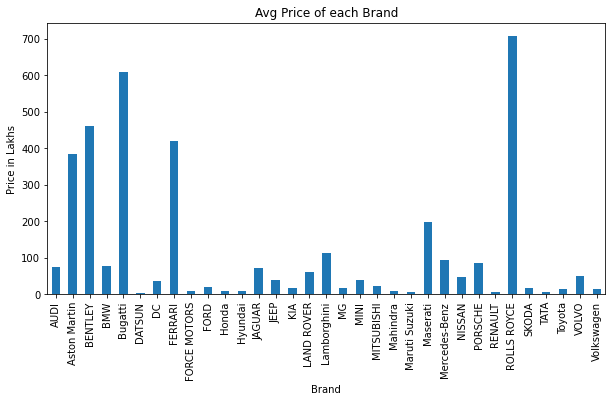

In [190]:
# Lets visualize what is the Average Price of Each Brand of car
plt.figure(figsize=(10,5))
car_df.groupby('Brand')['PriceLakhs'].mean().plot.bar()
plt.title("Avg Price of each Brand")
plt.ylabel('Price in Lakhs')
plt.show()

<font color = 'Green' face='Comic Sans MS'> - Rolls Royce produces acrs with highest price <br>
    - Honda, Hyundai, Datsun, Maruti Suzuki, Renault and Tata have cars with low costs
    </font>

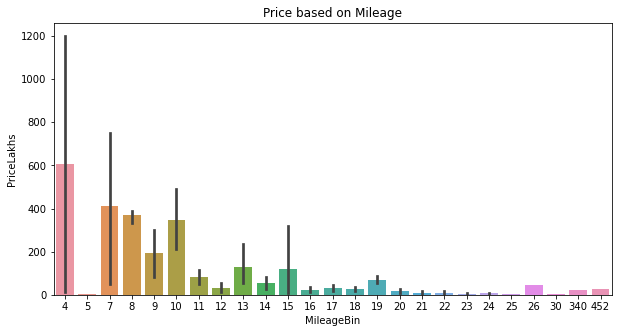

In [189]:
# Lets visualize what is the Avg Price based on Mileage
car_df['MileageBin'] = car_df['Mileage'].str.extract('(\d+\.?\d*)').astype(float)
car_df['MileageBin'] = car_df['MileageBin'].apply(lambda x : 0 if pd.isna(x) else round(x))

plt.figure(figsize=(10,5))
sns.barplot(data = car_df,x='MileageBin',y='PriceLakhs')
plt.title("Price based on Mileage")
plt.show()

<font color = 'Green' face='Comic Sans MS'> - Car Having low Mileage have high cost </font>

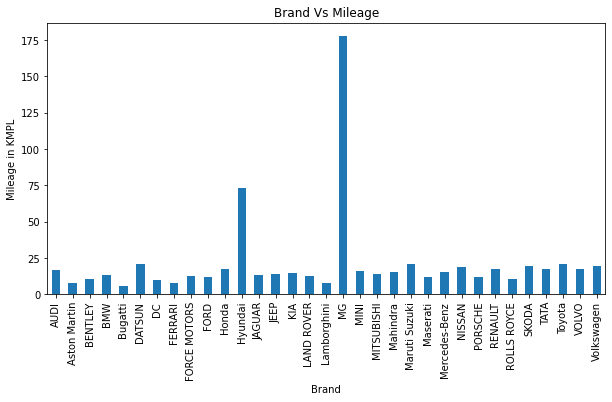

In [188]:
# Lets visualize Brand vs Mileage
plt.figure(figsize=(10,5))

car_df.groupby('Brand')['MileageBin'].mean().plot.bar()
plt.ylabel('Mileage in KMPL')
plt.title("Brand Vs Mileage")
plt.show()

 - Most of the cars have same average mileage which shows that the manufacturers are building cars with low mileage as well as high mileage.

In [195]:
# Check Transmission Values
car_df.Transmission.value_counts()

Automatic                                     76
Automatic/Manual                              62
Manual                                        18
Manual / Automatic                             7
MANUAL                                         4
8 Speed ZF Satellite Aided Automatic Trans     1
8 speed Automatic                              1
8 Speed Automatic                              1
Manual & Automatic                             1
8 speed ZF Satellite aided transmission        1
Name: Transmission, dtype: int64

In [202]:
# Replace Automatic & Manual , Automatic/Manual and Manual / Automatic to have same value
car_df['Transmission'] = car_df['Transmission'].replace({"Manual / Automatic":"Automatic/Manual", "Manual & Automatic":"Automatic/Manual",'MANUAL':"Manual"})

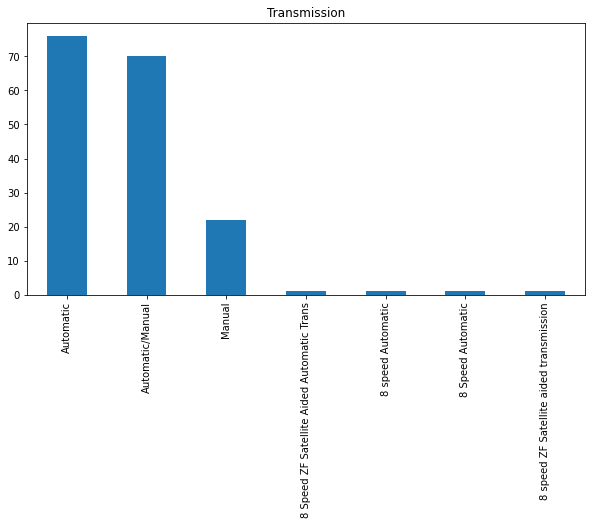

In [203]:
# Check transmission 
plt.figure(figsize=(10,5))
car_df.Transmission.value_counts().plot.bar()
plt.title("Transmission")
plt.show()


 - The Above graph shows Vehicles with Automatic Transmission are manufactured the most, followed by models having both Automatic and Manual vehicles

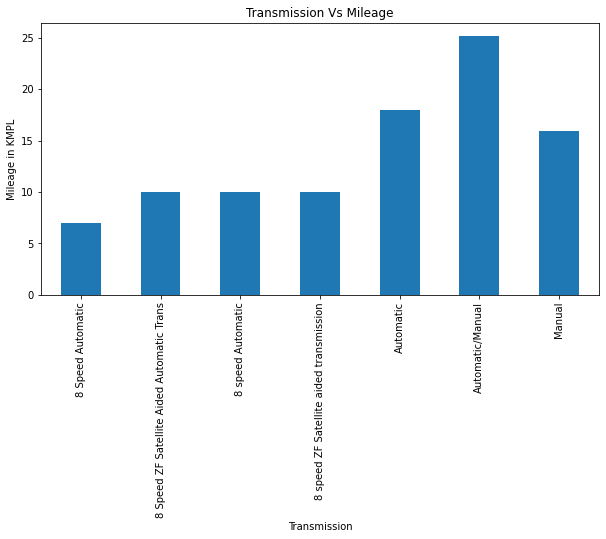

In [204]:
# Lets visualize Transmission vs Mileage
plt.figure(figsize=(10,5))

car_df.groupby('Transmission')['MileageBin'].mean().plot.bar()
plt.ylabel('Mileage in KMPL')
plt.title("Transmission Vs Mileage")
plt.show()

 - If we exclude cars of Automatic/manual as we can't correctly detrmine the type, Automatic cars have high Mileage

 -  All the above Analysis would give good enough insights for some of the good decisions by the new company